In [4]:
import pandas as pd
import os

In [5]:
from constants import ROOT_DIR

In [24]:
from typing import List

def slice_by(df: pd.DataFrame, column_name_to_slice_by: str) -> List[pd.DataFrame]:
    """
    :param df: dataframe with multiple time series
    :param column_name_to_slice_by: str, column name to identify unique time series
    :return: list of dataframes.
    """
    ret = []
    for _, group in df.groupby(column_name_to_slice_by, sort=False):
        ret.append(group)
    return ret

In [13]:
path = os.path.join(ROOT_DIR, "data/export/merged_surveys.csv")

df = pd.read_csv(path)
print(df.shape)
df.head()

(33600, 18)


,user_id,survey_id,survey_item_index,filename,has_reply,time_spent_on_item,video_duration,last_modified,emotion_1,video_id,mix,emotion_1_id,emotion_2_id,intensity_level,reply,generic_id,condition,accurate
0,furhat_audio_video_0012,00e3e851d15293e8eb60335e42354a59794eec7a47ba0a...,0,A221_gra_v_2.mp4,1,6882,4660,2024-12-16T16:54:43.230284+01:00,gratitude,A221,0,7,100,2,37,12,furhat_audio_video_,False
1,furhat_audio_video_0012,00e3e851d15293e8eb60335e42354a59794eec7a47ba0a...,1,A426_conc_p_2.mp4,1,7659,2820,2024-12-16T16:54:51.200502+01:00,concentration,A426,0,27,100,2,26,12,furhat_audio_video_,False
2,furhat_audio_video_0012,00e3e851d15293e8eb60335e42354a59794eec7a47ba0a...,2,A67_conc_p_2.mp4,1,9514,7840,2024-12-16T16:55:01.101944+01:00,concentration,A67,0,27,100,2,26,12,furhat_audio_video_,False
3,furhat_audio_video_0012,00e3e851d15293e8eb60335e42354a59794eec7a47ba0a...,3,A407_bor_p_2.mp4,1,5985,2760,2024-12-16T16:55:07.403552+01:00,boredom,A407,0,26,100,2,26,12,furhat_audio_video_,True
4,furhat_audio_video_0012,00e3e851d15293e8eb60335e42354a59794eec7a47ba0a...,4,A417_det_p_3.mp4,1,4948,2180,2024-12-16T16:55:12.743556+01:00,determination,A417,0,2,100,3,2,12,furhat_audio_video_,True



Condition: furhat_audio_video_
(4704, 18)
0.3201530612244898

Condition: original_video_
(4800, 18)
0.465625

Condition: original_audio_
(4512, 18)
0.32845744680851063

Condition: metahuman_video_
(4800, 18)
0.205

Condition: furhat_video_
(5184, 18)
0.2013888888888889

Condition: original_audio_video_
(4896, 18)
0.5208333333333334

Condition: metahuman_audio_video_
(4704, 18)
0.3424744897959184
                condition  accuracy
0     furhat_audio_video_  0.320153
1         original_video_  0.465625
2         original_audio_  0.328457
3        metahuman_video_  0.205000
4           furhat_video_  0.201389
5   original_audio_video_  0.520833
6  metahuman_audio_video_  0.342474


<Axes: xlabel='condition'>

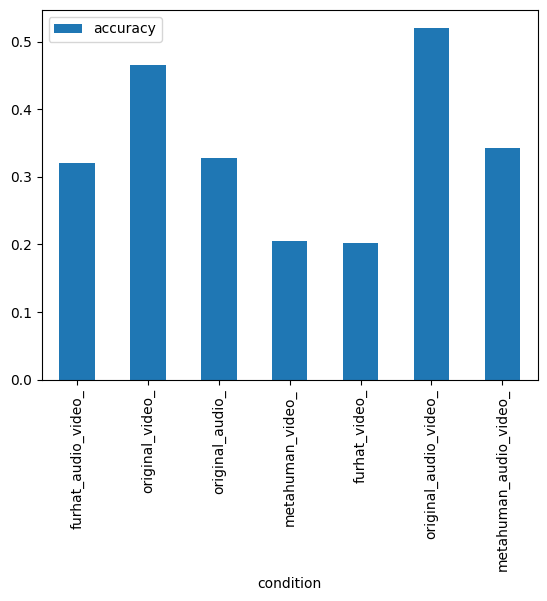

In [23]:
conditions = df["condition"].unique()

accuracies = []

for c in conditions:
    print("\nCondition:", c)

    df_c = df[df["condition"] == c]

    print(df_c.shape)
    print(df_c["accurate"].mean())


    accuracies.append({"condition":
                        c, "accuracy":
                        df_c["accurate"].mean()})


df_accuracies = pd.DataFrame(accuracies)
print(df_accuracies)
df_accuracies.plot(x="condition", y="accuracy", kind="bar")


Condition: furhat_audio_video_

Condition: original_video_

Condition: original_audio_

Condition: metahuman_video_

Condition: furhat_video_

Condition: original_audio_video_

Condition: metahuman_audio_video_


<Axes: ylabel='Frequency'>

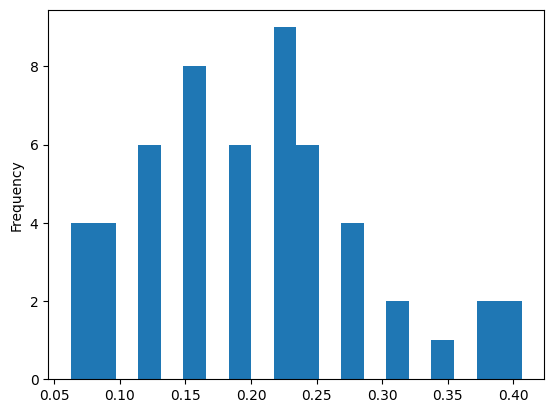

In [42]:
conditions = df["condition"].unique()
ids = df["generic_id"].unique()

accuracies = []

for c in conditions:
    print("\nCondition:", c)
    df_c = df[df["condition"] == c]

    for i in ids:
        df_i = df_c[df_c["generic_id"] == i]
        accuracies.append({"condition": c, "generic_id": i, "accuracy": df_i["accurate"].mean()})


df_accuracies = pd.DataFrame(accuracies)

df_accuracies[df_accuracies["condition"] == "furhat_video_"]["accuracy"].plot(kind="hist", bins=20)


In [39]:
df_accuracies[df_accuracies["condition"] == "metahuman_video_"]

,condition,generic_id,accuracy
162,metahuman_video_,12,0.15625
163,metahuman_video_,26,0.15625
164,metahuman_video_,8,0.12500
165,metahuman_video_,7,0.37500
166,metahuman_video_,66,0.12500
167,metahuman_video_,11,0.31250
168,metahuman_video_,43,0.09375
169,metahuman_video_,49,0.21875
170,metahuman_video_,13,0.18750
171,metahuman_video_,22,0.15625
